In [1]:
import warnings
warnings.filterwarnings("ignore")
#for handling RAM
import gc 
import pingouin as pg

#stats
from statsmodels.stats.anova import AnovaRM
#import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
#import pingouin as pg


#my to go packages
import math
import random
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.gridspec import GridSpec
from matplotlib import cm


#for readin
import glob # Package for Unix-style pathname pattern expansion
import os   # Python operating system interface

#for signal processing
from scipy.interpolate import CubicSpline,interp1d
import scipy.signal as signal
import scipy.stats as stats
from scipy.signal import filtfilt, butter
from scipy.fft import rfft, rfftfreq
from scipy.stats import sem 
from scipy.stats import norm
from scipy.stats import ttest_rel
import scipy.io

#other packages
import ast
import itertools
from itertools import groupby
from more_itertools import consecutive_groups
import more_itertools as mit
from operator import itemgetter
import statistics
from sklearn.mixture import GaussianMixture

import math, pywt
import matplotlib.ticker as ticker


In [2]:
def cohenD(group1,group2):
    # Calculate means
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)

    # Calculate standard deviations
    std1 = np.std(group1, ddof=1)  # Sample standard deviation
    std2 = np.std(group2, ddof=1)

    # Calculate sample sizes
    n1 = len(group1)
    n2 = len(group2)

    # Calculate pooled standard deviation
    pooledstd = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

    # Calculate Cohen's d
    cohend = (mean1 - mean2) / pooledstd
    return cohend

In [3]:
def fs(width,height):#setting plot size
    plt.rcParams['figure.figsize'] = (width,height)

In [4]:
winsize = 100
freq = 1000
task = 'precue'
loadRaw = False
freqOrMag = 'mag'

In [5]:
if loadRaw:

    gs = np.load("Z:/yueying/gazeObject_YueyingDong/results/variables/sacc/gazeShift_360to400.npy",allow_pickle=True)
    if freqOrMag == 'freq':
        saccEvent = gs[0]
        saccEvent[:,1:] = np.where(saccEvent[:,1:] != 0, 1, 0)

        saccFreq = pd.DataFrame(saccEvent[:,1:]).astype(int).rolling(window = winsize,min_periods = winsize,axis = 1).sum()*freq/winsize
        saccFreq['TRIALID'] = saccEvent[:,0]

        saccFreq['task'] = task

        psyFull = pd.DataFrame()
        for i in glob.glob('Z:/yueying/gazeObject_YueyingDong/results/data/psychopy/*.csv'):
            psyFull = pd.concat([psyFull,pd.read_csv(i).iloc[:,:]],axis = 0)
        saccFreq = saccFreq.merge(psyFull[['stimImage','TRIALID','trlType','participant']])
else:
    saccFreq = pd.read_csv('Z:/yueying/gazeObject_YueyingDong/results/data/saccFreq/saccFreq.csv').iloc[:,1:]


In [6]:
meanSaccSubj = saccFreq.groupby(['task','participant']).mean(numeric_only=True)
meanSacc = meanSaccSubj.groupby(['task',]).mean(numeric_only=True)
semSacc = meanSaccSubj.groupby(['task',]).sem(numeric_only=True)

In [7]:
plt.rcParams['font.family'] = 'arial'

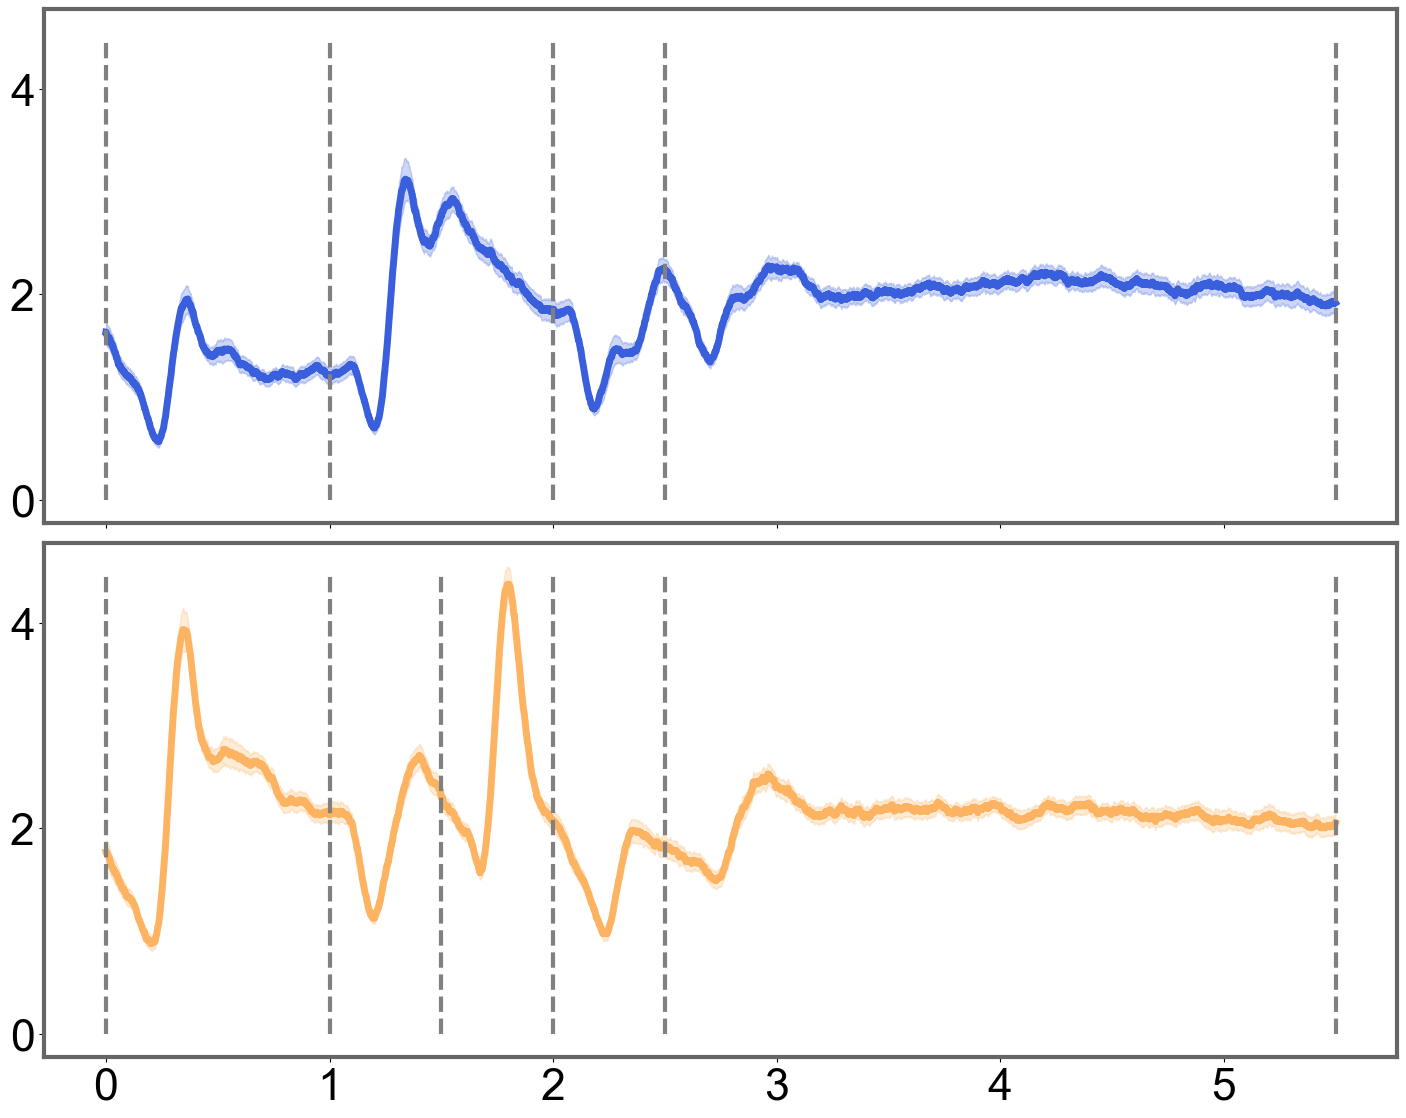

In [8]:
xAxis = np.linspace(0,5.5,5500)
fig,ax = plt.subplots(nrows = 2,figsize = (14,11),sharex=True,sharey = True)
[ax[i%2].plot(xAxis,meanSacc.iloc[i,500:6000],color = ['#395fdc','#fdb462'][i%2],linewidth = 5,
               label = meanSacc.index.get_level_values(0)[i]) for i in range(2)];

[ax[i%2].fill_between(xAxis,meanSacc.iloc[i,500:6000] - semSacc.iloc[i,500:6000],meanSacc.iloc[i,500:6000] + semSacc.iloc[i,500:6000],color = ['#395fdc','#fdb462'][i%2], alpha = 0.25
               ) for i in range(2)];

#[ax[i].legend(bbox_to_anchor = (1.3,1)) for i in range(2)]

ax[0].vlines(np.array([0.5,1.5,2.5,3,6])-0.5,0,4.5,colors = 'grey',linestyles = 'dashed',linewidth = 3)
ax[1].vlines(np.array([0.5,1.5,2,2.5,3,6])-0.5,0,4.5,colors = 'grey',linestyles = 'dashed',linewidth = 3)
plt.tight_layout()
ax[0].tick_params(axis='y', which='major', labelsize=32)
ax[1].tick_params(axis='y', which='major', labelsize=32)
ax[1].tick_params(axis='x', which='major', labelsize=32)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))


ax[0].spines['left'].set_color('#666666')
ax[0].spines['bottom'].set_color('#666666')
ax[0].spines['right'].set_color('#666666')
ax[0].spines['top'].set_color('#666666')
ax[0].spines['left'].set_linewidth(3)
ax[0].spines['bottom'].set_linewidth(3)
ax[0].spines['right'].set_linewidth(3)
ax[0].spines['top'].set_linewidth(3)

ax[1].spines['left'].set_color('#666666')
ax[1].spines['bottom'].set_color('#666666')
ax[1].spines['right'].set_color('#666666')
ax[1].spines['top'].set_color('#666666')
ax[1].spines['left'].set_linewidth(3)
ax[1].spines['bottom'].set_linewidth(3)
ax[1].spines['right'].set_linewidth(3)
ax[1].spines['top'].set_linewidth(3)

In [9]:
meanSaccSubj = saccFreq.groupby(['task','trlType','participant']).mean(numeric_only=True)
meanSacc = meanSaccSubj.groupby(['task','trlType',]).mean(numeric_only=True)
semSacc = meanSaccSubj.groupby(['task','trlType',]).sem(numeric_only=True)

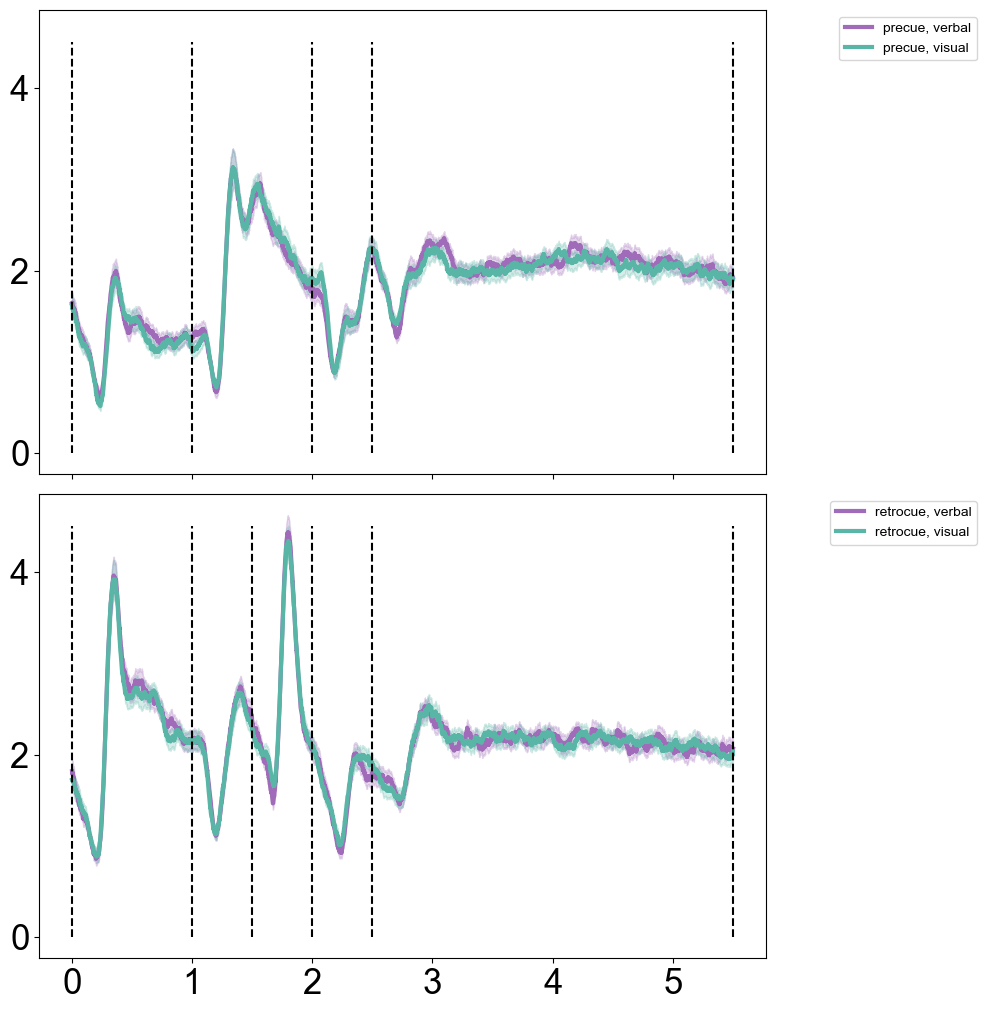

In [10]:
xAxis = np.linspace(0,5.5,5500)
fig,ax = plt.subplots(nrows = 2,figsize = (10,10),sharex=True,sharey = True)
[ax[i//2].plot(xAxis,meanSacc.iloc[i,500:6000],color = ['#a06bb9','#59b6a6'][i%2],linewidth = 3,
               label = meanSacc.index.get_level_values(0)[i]+ ', ' + meanSacc.index.get_level_values(1)[i]) for i in range(4)];

[ax[i//2].fill_between(xAxis,meanSacc.iloc[i,500:6000] - semSacc.iloc[i,500:6000],meanSacc.iloc[i,500:6000] + semSacc.iloc[i,500:6000],color = ['#a06bb9','#59b6a6'][i%2], alpha = 0.25
               ) for i in range(4)];

[ax[i].legend(bbox_to_anchor = (1.3,1)) for i in range(2)]

ax[0].vlines(np.array([0.5,1.5,2.5,3,6])-0.5,0,4.5,colors = 'black',linestyles = 'dashed')
ax[1].vlines(np.array([0.5,1.5,2,2.5,3,6])-0.5,0,4.5,colors = 'black',linestyles = 'dashed')
plt.tight_layout()
ax[0].tick_params(axis='y', which='major', labelsize=25)
ax[1].tick_params(axis='y', which='major', labelsize=25)
ax[1].tick_params(axis='x', which='major', labelsize=25)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))



In [11]:
meanSaccSubj = saccFreq.groupby(['task','participant']).mean(numeric_only=True)

meanSaccSubj_epochAvg = meanSaccSubj.copy()
meanSaccSubj_epochAvg = meanSaccSubj_epochAvg.iloc[:,:2]

In [12]:
meanSaccSubj_epochAvg.iloc[:,0] = pd.concat([meanSaccSubj.loc['precue'].iloc[:,1500:2500].mean(axis =1), 
           meanSaccSubj.loc['retrocue'].iloc[:,500:1500].mean(axis =1)],axis = 0).reset_index(drop = True)

meanSaccSubj_epochAvg.iloc[:,1] = pd.concat([meanSaccSubj.loc['precue'].iloc[:,3000:6000].mean(axis =1), 
           meanSaccSubj.loc['retrocue'].iloc[:,3000:6000].mean(axis =1)],axis = 0).reset_index(drop = True)

meanSaccSubj_epochAvg.columns = ['stim','delay']
meanSaccSubj_epochAvg = meanSaccSubj_epochAvg.reset_index()

In [13]:
meanSaccSubj_epochAvg = meanSaccSubj_epochAvg.melt(id_vars=('task','participant'),value_vars=('stim','delay'),value_name='avgSaccFreq',var_name='epoch')

In [14]:
fs(5,5)